<a href="https://colab.research.google.com/github/michaelbigelow/NeuralNet/blob/master/MNISTdigits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Digit Classification
Simple neural network based on the tutorial at https://www.youtube.com/watch?v=BzcBsTou0C0&list=PLQVvvaa0QuDdeMyHEYc0gxFpYwHY2Qfdh

In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import transforms, datasets

# Data

In [2]:
train = datasets.MNIST("", 
                       train=True, 
                       download=True, 
                       # convert data to tensor format for use
                       transform=transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", 
                      train=False, 
                      download=True, 
                      # convert data to tensor format for use
                      transform=transforms.Compose([transforms.ToTensor()]))

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

## Examine a batch of data

In [4]:
for batch in trainset:
  print(batch)
  break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [6]:
x, y = batch[0][0], batch[1][0]

print(y)

tensor(1)


In [7]:
(batch[0][0].shape)

torch.Size([1, 28, 28])

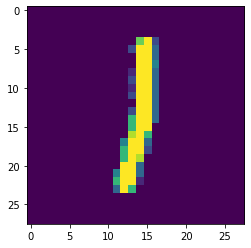

In [9]:
plt.imshow(x.view(28, 28))
plt.show()

## How balanced is the dataset?

In [10]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
  Xs, ys = data
  for y in ys:
    counter_dict[int(y)] += 1
    total += 1
print(counter_dict)


{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [11]:
for i in counter_dict:
  print(f"{i}: {counter_dict[i]/total*100}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


# Build the feedforward net

In [14]:
class Net(nn.Module):

  def __init__(self):
    # generally include to inherit from nn.Module
    super().__init__()
    # first layer input neurons = number of pixels
    self.fc1 = nn.Linear(in_features=28*28, out_features=64)
    # each layer's input equals previous layer's output
    self.fc2 = nn.Linear(in_features=64, out_features=64)
    self.fc3 = nn.Linear(in_features=64, out_features=64)
    # final layer output neurons = number of classes
    self.fc4 = nn.Linear(in_features=64, out_features=10)

  def forward(self, x):
    # rectified linear units for first three connections
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    # softmax for final
    x = self.fc4(x)
    return F.log_softmax(x, dim=1)

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


Create random data

In [15]:
X = torch.rand((28, 28))
X = X.view(-1, 28*28)

Feed data through feedforward net

In [16]:
output = net(X)

In [24]:
output

tensor([[-2.2330, -2.3323, -2.4570, -2.2040, -2.2733, -2.2299, -2.4153, -2.3103,
         -2.2200, -2.3863]], grad_fn=<LogSoftmaxBackward>)

# Training
Set optimizer, loss, and number of epochs

In [17]:
optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
  for data in trainset:
    # data is a list of featuresets and labels, of the batch_size set above (10)
    X, y = data
    net.zero_grad()
    output = net(X.view(-1, 28*28))
    loss = F.nll_loss(output, y)
    loss.backward()
    optimizer.step()
  print(loss)

tensor(0.6498, grad_fn=<NllLossBackward>)
tensor(0.0104, grad_fn=<NllLossBackward>)
tensor(0.0190, grad_fn=<NllLossBackward>)


## Training accuracy

In [18]:
correct = 0
total = 0

with torch.no_grad():
  for data in trainset:
    X, y = data
    output = net(X.view(-1, 784))
    for idx, i in enumerate(output):
      if torch.argmax(i) == y[idx]:
        correct += 1
      total += 1

print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.975


## Test set accuracy

In [19]:
correct = 0
total = 0

with torch.no_grad():
  for data in testset:
    X, y = data
    output = net(X.view(-1, 784))
    for idx, i in enumerate(output):
      if torch.argmax(i) == y[idx]:
        correct += 1
      total += 1

print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.964


## Manually examine images & classifications for a batch

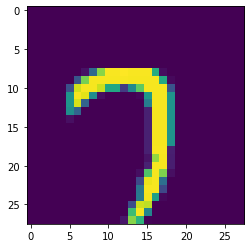

In [23]:
# change index of X[] to some number 0-9 here...
plt.imshow(X[1].view(28, 28))
plt.show()

In [24]:
# ...to the same number here.
print(torch.argmax(net(X[1].view(-1, 784))[0]))

tensor(7)
